# Table of Contents
* &nbsp;
	* [Filtering](#Filtering)
		* [General relations for cross-correlations](#General-relations-for-cross-correlations)
		* [By-products](#By-products)
		* [Examples
 ](#Examples)
		* [Correlation matrix](#Correlation-matrix)
		* [Identification of a filter by cross-correlation](#Identification-of-a-filter-by-cross-correlation)


In [1]:
%run nbinit.ipy
js_addon()

... Configuring matplotlib formats
... Configuring matplotlib with inline figures
... Importing numpy as np, scipy as sp, pyplot as plt, scipy.stats as stats
   ... scipy.signal as sig
... Importing widgets, display, HTML, Image, Javascript
... Some LaTeX definitions


... Defining figures captions 


... Loading customized Javascript for interactive solutions (show/hide)


In [6]:
from scipy.signal import lfilter
from scipy.fftpack import fft, ifft
%matplotlib inline

## Filtering

### General relations for cross-correlations

We consider a situation where we want to study the correlations between the different inputs and outputs of a pair of two filters: 
$$
\left\{
\begin{array}{lcr}
Y_1(n,\omega) & = & (X_1*h_1)(n,\omega),\\
Y_2(n,\omega) & = & (X_2*h_2)(n,\omega),
\end{array}
\right.
$$

<img src="fig_filter1.png" style="max-height: 60%; max-width: 60%;" />
<img src="fig_filter2.png" style="max-height: 60%; max-width: 60%;" />

Let us compute the intercorrelation between $Y_1(n)$ and $Y_2(n)$ :
$$
R_{Y_1Y_2}(m) = \E{Y_1(n,\omega)Y_2^*(n-m,\omega))} = 
\E{(X_1*h_1)(n,\omega))(X_2^* *h_2^*)(n-m,\omega))}. 
$$
The two convolution products are
\begin{eqnarray*}
(X_1*h_1)(n,\omega)) & = & \sum_u X_1(u,\omega))h_1(n-u),\\
(X_2*h_2)(n-m,\omega))& = & \sum_v X_2(v,\omega))h_2(n-m-v), 
\end{eqnarray*}
and
\begin{eqnarray*}
R_{Y_1Y_2}(m) & = & \E{\sum_u X_1(n-u,\omega))h_1(u)\sum_v 
X_2^*(n-m-v,\omega))h_2^*(v)}\\
& = & \E{\sum_u \sum_v X_1(n-u)h_1(u) X_2^*(n-m-v)h_2^*(v)}\\
& = & \sum_u \sum_v h_1(u) R_{X_1X_2}(m+v-u) h_2^*(v).
\end{eqnarray*}
Looking at the sum over $u$, we recognize a convolution  product between
$h_1$ and $R_{X_1X_2}$, expressed at time $(m+v)$ :
\begin{eqnarray*}
R_{Y_1Y_2}(m) & = & \sum_v (h_1 * R_{X_1X_2})(m+v) h_2^*(v)\\
& = & \sum_v (h_1 * R_{X_1X_2})(m+v) h_2^{(-)*}(-v),
\end{eqnarray*}
where we have noted $h_2^{(-)}(v) = h_2(-v)$. In this last relation, we recognize anoter convolution product, this time between  $(h_1 * R_{X_1X_2})$ and $h_2^{*(-)}$ :
\begin{eqnarray*}
R_{Y_1Y_2}(m) & = & \sum_v (h_1 * R_{X_1X_2})(m+v) h_2^{*(-)}(-v)\\
& = & \sum_{v'}(h_1 * R_{X_1X_2})(m-v') h_2^{*(-)}(v') \\
& = & \left( h_1 * R_{X_1X_2} * h_2^{*(-)} \right) (m).
\end{eqnarray*}

We finally obtain the important formula:
$$
\boxed{R_{Y_1Y_2}(m) = \left( h_1 * R_{X_1X_2} * h_2^{*(-)}\right) (m)}.
$$

### By-products

- **[Autocorrelation of the output of a filter]** With a single filter we can apply the previous formula, with 
$$
\left\{
\begin{array}{l}
X_1=X_2=X, \\
h_1=h_2=h.
\end{array}
\right.
$$
Of course $Y_1=Y_2=Y$, and
$$
\boxed{R_{YY}(m) = \left( h * R_{XX} * h^{*(-)}\right) (m)}.
$$

- **[Cross correlation between output and input]** We want to measure the correlation between the input and output of a filter. Toward this goal, we consider
$$
\left\{
\begin{array}{l}
X_1=X_2=X, \\
Y_1=Y,\\
Y_2=X,
h_1=h, \\
h_2=h.
\end{array}
\right.
$$
In this case, we got
$$
\boxed{R_{YX}(m) = \left( h * R_{XX}\right) (m)}.
$$
The cross correlation between the output and the input of filter has the very same apparence as the filtering which links the output to the input. 

### Examples  

 
 
 >We study now the filtering of random signals. We begin with the classical impulse response $h(n) = a^n$, with $x(n)$ a uniform distributed white noise at the input, and we denote $y(n)$ the output. 
 
 >1. Filter the signal $x(n)$, with the help of the function `lfilter`. Compare the input and output signals, and in particular their variations. Compare the histograms. Look at the Fourier transform of the output. Do this for several values of $a$, beginning with $a=0.9$.
 
 >2. Using the function `xcorr` (import it via `from correlation import xcorr`), compute all the possible correlations between the input and the output. What would be the correlation matrix associated with the signal $x(n) = [x(n)~ y(n)]^t$? Compare the impulse response $h$ to the cross-correlation $Ryx(k)$. Explain. Experiment by varying the number of samples $N$ and $a$ (including its sign).
 
 >3. Consider the identification of the impulse response by cross-correlation, as above, but in the noisy case. Add a Gaussian noise to the output and compute the cross-correlation. Observe, comment and experiment with the parameters. 

 
 The filtering is done thanks to the function `lfilter`. We have first to import it, _eg_ as
 
     from scipy.signal import lfilter
 We will also need to play with ffts so it is a good time to import it from fftpack
 
     from scipy.fft import fft, ifft
     

In [ ]:
N=1000 #Number of samples
x=stats.uniform(-0.5,1).rvs(N)
a=0.9
# Filtering and plots...
# FILL IN...

In [1]:
from IPython.display import HTML, display, Javascript
display(HTML('<div class="onoffswitch">\n<input type="checkbox" name="onoffswitch" class="onoffswitch-checkbox"\nonclick="document.getElementById('+"'myCheck8'"+').checked ? \nshow_input(1) : hide_input(1)" \nid="myCheck8"  checked>\n<label class="onoffswitch-label" for="myCheck8"> \n<span class="onoffswitch-inner"></span> \n<span class="onoffswitch-switch"></span>\n</label>\n</div>'))

In [ ]:
y=lfilter([1],[1, -a],x)
figure(figsize=(8,3))
plot(x); xlabel("Time"); title("Initial signal")
figure(figsize=(8,3))
plot(y); xlabel("Time"); title("Filtered signal") 

In [ ]:
#Histograms 
# FILL IN

In [10]:
unhide_all_cells()

<IPython.core.display.Javascript object>

 We see that the output has slower variations than the input. This is the result of the filtering operation. Let us now look at the histograms: 

In [3]:
from IPython.display import HTML, display, Javascript
display(HTML('<div class="onoffswitch">\n<input type="checkbox" name="onoffswitch" class="onoffswitch-checkbox"\nonclick="document.getElementById('+"'myCheck5'"+').checked ? \nshow_input(2) : hide_input(2)" \nid="myCheck5"  checked>\n<label class="onoffswitch-label" for="myCheck5"> \n<span class="onoffswitch-inner"></span> \n<span class="onoffswitch-switch"></span>\n</label>\n</div>'))

In [ ]:
# Histograms
figure(figsize=(8,3))
plt.hist(x,bins=20); plt.xlabel("Amplitude"); plt.title("Initial signal") 
figure(figsize=(8,3))
plt.hist(y,bins=20); plt.xlabel("Amplitude"); plt.title("Filtered signal") 

While the initial signal is uniformly distributed, the histogram of the output looks like the histogram of a gaussian. Actually, this is related to the central limit theorem: the mixture of iid variables tends to a gaussian. This also explains th emodification of the amplitudes observed on the time signal. 

 Let us finally look at the Fourier transform:

In [ ]:
#FILL IN

In [4]:
from IPython.display import HTML, display, Javascript
display(HTML('<div class="onoffswitch">\n<input type="checkbox" name="onoffswitch" class="onoffswitch-checkbox"\nonclick="document.getElementById('+"'myCheck3'"+').checked ? \nshow_input(3) : hide_input(3)" \nid="myCheck3"  checked>\n<label class="onoffswitch-label" for="myCheck3"> \n<span class="onoffswitch-inner"></span> \n<span class="onoffswitch-switch"></span>\n</label>\n</div>'))

In [ ]:
f=arange(N)/N-0.5
fig,ax=subplots(2,1,figsize=(7,5))
ax[0].plot(f,abs(fftshift(fft(x))))
ax[0].set_title("Fourier transform of the input")
ax[0].set_xlabel("Frequency")
ax[0].axis('tight')  #Tight layout of the axis
ax[1].plot(f,abs(fftshift(fft(y))))
ax[1].set_title("Fourier transform of the output")
ax[1].set_xlabel("Frequency")
fig.tight_layout()
ax[1].axis('tight')

 Recall how the transfer function changes with $a$:

In [ ]:
figure(figsize=(8,3))
d=zeros(N); d[0]=1
for a in (-0.95, -0.8, -0.4, 0.4, 0.8, 0.9):
    h=lfilter([1],[1, -a],d)
    H=fft(h)
    plot(f,abs(fftshift(H)),label='a={}'.format(a))
    
legend() 
axis('tight')
_=xlabel("Frequency")

### Correlation matrix

In [ ]:
from correlation import xcorr
N=1000 #Number of samples
x=stats.uniform(-0.5,1).rvs(N)
a=0.8
y=lfilter([1],[1, -a],x)

L=30
Rxx,lags=xcorr(x,x,maxlags=L)
Rxy,lags=xcorr(x,y,maxlags=L)
Ryx,lags=xcorr(y,x,maxlags=L)
Ryy,lags=xcorr(y,y,maxlags=L)
fig,ax=subplots(2,2,figsize=(7,5))
axf=ax.flatten()
Rtitles=('Rxx','Rxy','Ryx','Ryy')
for k,z in enumerate((Rxx,Rxy,Ryx,Ryy)):
    axf[k].plot(lags,z)
    axf[k].set_title(Rtitles[k])
fig.tight_layout()    

 We have represented above all the possible correlations between the input and the ouput. This representation corresponds to the correlation matrix of the vector $z(n)=[x(n) ~~ y(n)]^H$ that would give
 $$
 \mathbb{E}\left\{ \left[\begin{array}[c]{c}
 x(n)\\
 y(n)
 \end{array}\right]\left[\begin{array}[c]{cc}
 x(n-k)^{*} & y(n-k)^{*}\end{array}\right]\right\} =\left[\begin{array}[c]{cc}
 R_{xx}(k) & R_{xy}(k)\\
 R_{yx}(k) & R_{yy}(k)
 \end{array}\right]
 $$

### Identification of a filter by cross-correlation

 We know that the cross-correlation of the output of a system with IR $h$ with its input is given by 
 $$
 R_{yx}(k)=\left(R_{xx}*h\right)(k).
 $$
 When the input is a white noise, then its autocorrelation $R_{xx}(k)$ is a Dirac impulse with weight $\sigma_x^2$,  $R_{xx}(k)=\sigma_x^2\delta(k)$, and $R_{yx}$ is proportional to the impulse response:
 $$
 R_{yx}(k)=\sigma_x^2 h(k).
 $$
 This is what we observe here:

Uniform distribution:  Value of the mean : 0.500 and of the variance 0.083


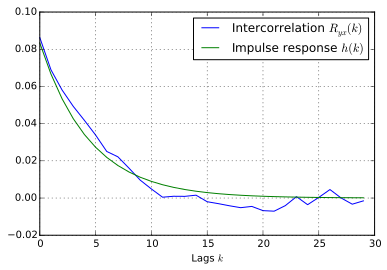

In [8]:
# An object "uniform random variable" with fixed bounds [0,1]
from correlation import xcorr
x_uni=stats.uniform(loc=0,scale=1)
(m,v)=x_uni.stats(moments='mv')
print("Uniform distribution: ","Value of the mean : {0:2.3f} and of the variance {1:2.3f}".format(float(m),float(v)))
N=1000 #Number of samples
x=stats.uniform(-0.5,1).rvs(N)  #generates N values for x
a=0.8
y=lfilter([1],[1, -a],x) #Computes the output of the system
L=30
Ryx,lags=xcorr(y,x,maxlags=L) #then the cross-correlation
d=zeros(N); d[0]=1
h=lfilter([1],[1, -a],d)  #and the impulse response
plot(arange(L),Ryx[arange(L,L+L)],label="Intercorrelation $R_{yx}(k)$")
plot(arange(L),v*h[arange(L)],label="Impulse response $h(k)$")
xlabel("Lags $k$")
grid(True)
legend()

 In the noisy case, the same kind of observations hold. Indeed, if $z$ is a corrupted version of $y$, with $z(n)=y(n)+w(n)$, then 
 $$
 R_{zx}(k)=R_{yx}(k)+R_{wx}(k)=R_{yx}(k)
 $$
 provided that $x$ and $w$ are uncorrelated, which is reasonable assumption. 

In [9]:
N=1000
#Remember that the variance of $x$ is given by
x_uni=stats.uniform(-0.5,1)
(m,v)=x_uni.stats(moments='mv')
print("Uniform distribution: ","Value of the mean : {0:2.3f} and of the variance {1:2.3f}".format(float(m),float(v)))

Uniform distribution:  Value of the mean : 0.000 and of the variance 0.083


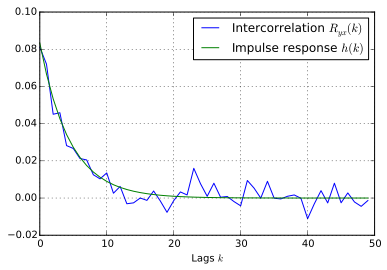

In [10]:
N=1000 #Number of samples
x=stats.uniform(-0.5,1).rvs(N)  #generates N values for x
a=0.8
y=lfilter([1],[1, -a],x)  #Computes the output of the system
w=stats.norm(0,1).rvs(N)  #Gaussian noise
y=y+0.5*w
L=50
Ryx,lags=xcorr(y,x,maxlags=L) #then the cross-correlation
d=zeros(N); d[0]=1
h=lfilter([1],[1, -a],d)  #and the impulse response
plot(arange(L),Ryx[arange(L,L+L)],label="Intercorrelation $R_{yx}(k)$")
plot(arange(L),v*h[arange(L)],label="Impulse response $h(k)$")
xlabel("Lags $k$")
grid(True)
legend()

 while the direct measure of the impulse response would give

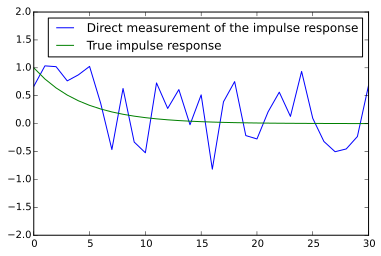

In [11]:
plot(arange(N),h+0.5*w,label="Direct measurement of the impulse response")
plot(arange(N),h,label="True impulse response")
xlim([0, 30])
_=legend()

 Hence, we see that identification of a system is possible by cross-correlation, even when dealing with noisy outputs. Such identification would be impossible by direct measurement of the IR, because of the presence of noise. 


----
<div align=right> <a href=toc.ipynb>Index</a> - <a href=Lecture1_RandomSignals.ipynb>Back</a> - <a href=Lecture3_RandomSignals.ipynb>Next</a></div>